#**Weather Prediction**

#**Importing Libraries**


In [ ]:
import numpy as np  #numpy
import pandas as pd  #pandas
import tensorflow as tf
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#math operations lib 
import math
from math import pi

#date manipulation 
import datetime as dt

#Missing data detector lib
import missingno as mn

#Impute missing data
#from sklearn.preprocessing import Imputer 


#Splitting data to test and train 
from sklearn.model_selection import train_test_split

import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from tensorflow import keras
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import StandardScaler
from collections import Counter
import time
import datetime as dt
from datetime import datetime
import collections
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib.pyplot import rcParams

from sklearn import linear_model

In [ ]:
data = pd.read_csv('weatherHistory.csv')
data.head() 

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
data.dtypes


Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
#Categorical variables:
cat = data.select_dtypes(include = ["object"]).keys()
print(cat)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [ ]:
#Quantitative variables:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
#'Formatted Date' transformation:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['year'] = data['Formatted Date'].dt.year
data['day']  = data['Formatted Date'].dt.day
data['month']  = data['Formatted Date'].dt.month
data['hour'] = data['Formatted Date'].dt.hour
data = data.drop('Formatted Date', axis=1)

data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,year,day,month,hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,31,3,22
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,31,3,23
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,1,4,0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,1,4,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,1,4,2


#**Heatmap**

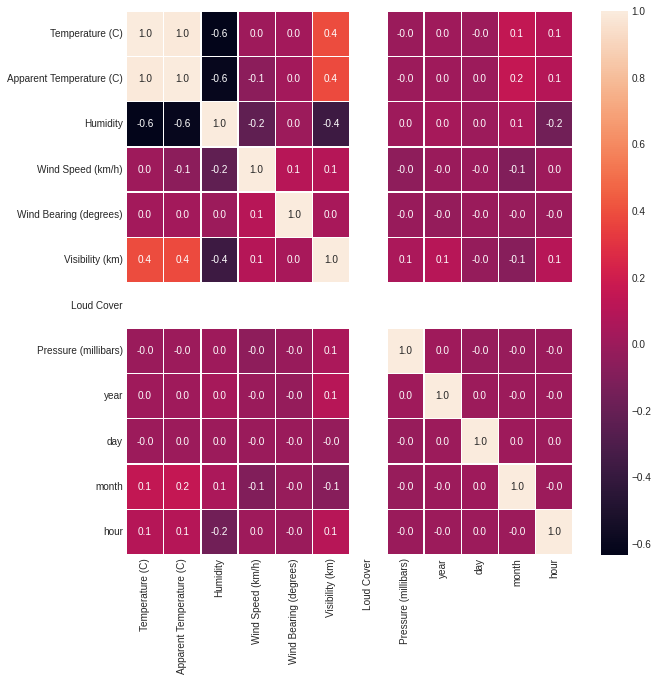

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

**Quantitative variables. Missing values**

In [ ]:
data[quantitative].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54fe1dbf10>,
      dtype=object)

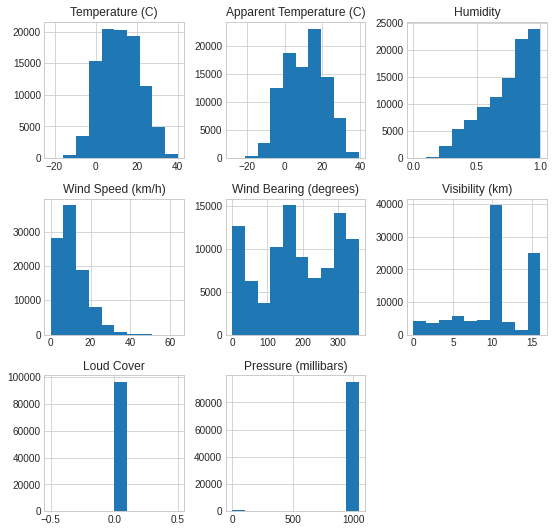

In [ ]:
#change the size
rcParams['figure.figsize'] = 9, 9
data[quantitative].hist()

In [ ]:
#Loud Cover' takes values zero hence we drop it
data=data.drop('Loud Cover',axis=1)

In [ ]:
#Some observations are nil. It seems that they lack values. because the pressure does not take zero as value.
#we fill the zeros with the median:
pressure_median = data['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x

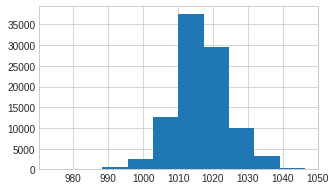

In [ ]:
data["Pressure (millibars)"] = data.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
data['Pressure (millibars)'].hist()

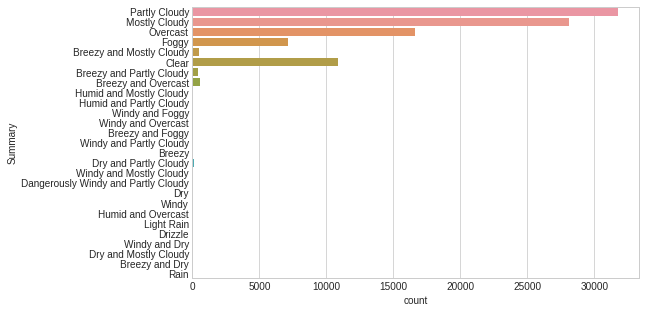

In [ ]:
#categorical variables
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['Summary'])


In [ ]:
data['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                                                                           20085
Partly cloudy throughout the day.                                                                                            9981
Partly cloudy until night.                                                                                                   6169
Partly cloudy starting in the morning.                                                                                       5184
Foggy in the morning.                                                                                                        4201
                                                                                                                            ...  
Partly cloudy starting overnight and breezy starting in the morning continuing until afternoon.                                24
Breezy starting overnight continuing until morning.                                       

In [ ]:
data['Summary'].value_counts(dropna=False)

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
data['Precip Type'].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [ ]:
#to replace Null values in dataframe
data.fillna(method='ffill', inplace=True)

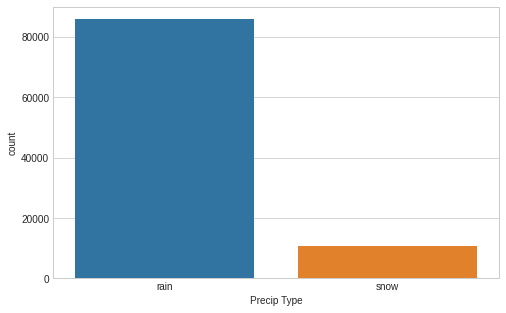

In [ ]:
sns.countplot(x=data['Precip Type'])


In [ ]:
# Calculate total number of cells in dataframe
totalCells = np.product(data.shape)

# Count number of missing values per column
missingCount = data.isnull().sum()

# Calculate total number of missing values
totalMissing = missingCount.sum()

# Calculate percentage of missing values
print("The weather history dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The weather history dataset contains 0.0 % missing values.


<Figure size 1296x576 with 0 Axes>

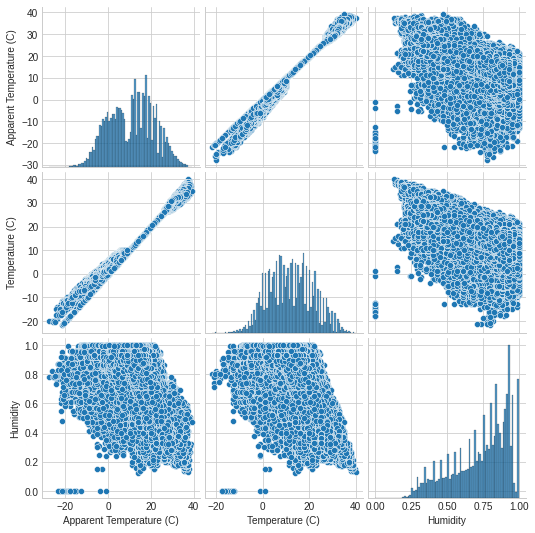

In [ ]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Apparent Temperature (C)','Temperature (C)', 'Humidity' ]])
plt.show()

<Figure size 1296x576 with 0 Axes>

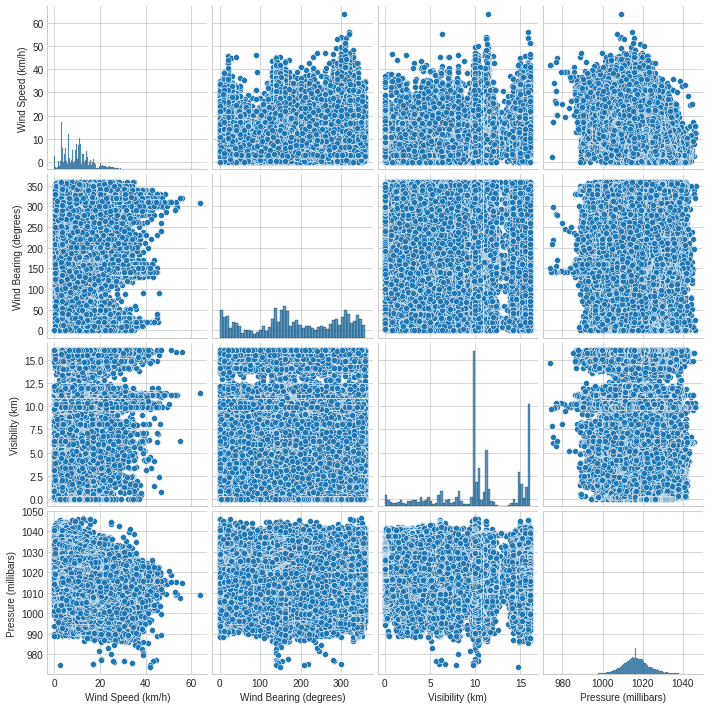

In [ ]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.show()

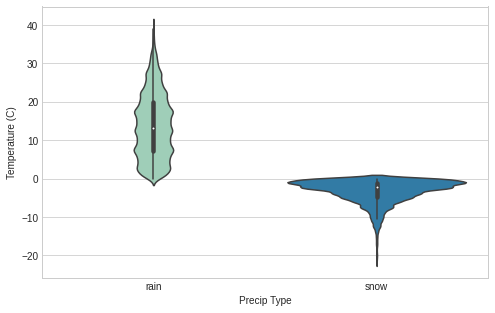

In [ ]:
sns.violinplot(x="Precip Type", y="Temperature (C)", data=data, palette="YlGnBu");

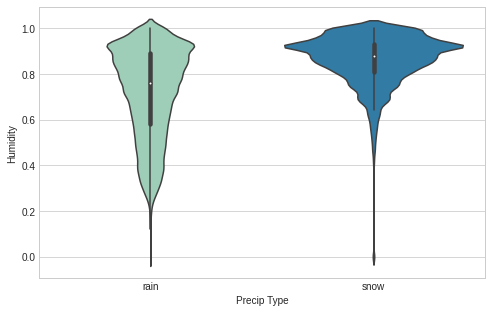

In [ ]:
sns.violinplot(x="Precip Type", y="Humidity", data=data, palette="YlGnBu");

#**Preprocessing**

In [ ]:
def change_category_to_number(DailySummaryCat):
    if DailySummaryCat=='Partly cloudy throughout the day.':
        return 1
    elif DailySummaryCat=='Mostly cloudy throughout the day.':
        return 2
    elif DailySummaryCat=='Foggy in the evening.':
        return 3
    elif DailySummaryCat=='Foggy overnight and breezy in the morning.':
        return 3
    elif DailySummaryCat=='Overcast throughout the day.':
        return 4
    elif DailySummaryCat=='Partly cloudy until night.':
        return 1
    elif DailySummaryCat=='Motly cloudy until night.':
        return 2
    elif DailySummaryCat=='Foggy starting overnight continuing until morning.':
        return 3
    elif DailySummaryCat=='Foggy in the morning.':
        return 3
    elif DailySummaryCat=='Partly cloudy until evening.':
        return 1
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 1
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until night.':
        return 2
    elif DailySummaryCat=='Partly cloudy starting in the afternoon.':
        return 1
    elif DailySummaryCat=='Partly cloudy starting overnight.':
        return 1
    elif DailySummaryCat=='Mostly cloudy starting overnight.':
        return 2
    elif DailySummaryCat=='Mostly cloudy until night and breezy in the afternoon.':
        return 2
    elif DailySummaryCat=='Mostly cloudy until evening.':
        return 2
    elif DailySummaryCat=='Foggy throughout the day.':
        return 3
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 1
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening.':
        return 1
    elif DailySummaryCat=='Foggy until morning.':
        return 3
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until night.':
        return 1
    elif DailySummaryCat=='Mostly cloudy starting in the morning.':
        return 2
    elif DailySummaryCat=='Foggy starting in the evening.':
        return 3
    elif DailySummaryCat=='Partly cloudy starting in the afternoon continuing until evening.':
        return 1
    elif DailySummaryCat=='Foggy overnight.':
        return 3
    elif DailySummaryCat=='Clear throughout the day.':
        return 4
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until night.':
        return 1
    elif DailySummaryCat=='Partly cloudy overnight.':
        return 1
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening.':
        return 1
    elif DailySummaryCat=='Foggy until night.':
        return 3
    elif DailySummaryCat=='Partly cloudy in the morning.':
        return 1
    elif DailySummaryCat=='Foggy starting overnight continuing until afternoon.':
        return 3
    elif DailySummaryCat=='Foggy until afternoon.':
        return 3
    elif DailySummaryCat=='Breezy and mostly cloudy overnight.':
        return 4
    elif DailySummaryCat=='Partly cloudy overnight and breezy starting in the morning continuing until afternoon.':
        return 1
    elif DailySummaryCat=='Breezy in the morning and foggy in the evening.':
        return 4
    elif DailySummaryCat=='Mostly cloudy until evening and breezy in the evening.':
        return 2
    elif DailySummaryCat=='Mostly cloudy starting in the evening.':
        return 2
    elif DailySummaryCat=='Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.':
        return 2
    elif DailySummaryCat=='Breezy starting in the morning continuing until night.':
        return 4
    elif DailySummaryCat=='Overcast throughout the day and breezy starting overnight continuing until morning.':
        return 4
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and foggy in the evening.':
        return 4
    elif DailySummaryCat=='Light rain until morning.':
        return 4
    elif DailySummaryCat=='Mostly cloudy until night and breezy starting in the afternoon continuing until night.':
        return 2
    elif DailySummaryCat=='Mostly cloudy starting in the morning continuing until afternoon.':
        return 2
    elif DailySummaryCat=='Breezy until afternoon and overcast throughout the day.':
        return 4
    elif DailySummaryCat=='Partly cloudy until evening and breezy in the afternoon.':
        return 1
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.':
        return 4
    elif DailySummaryCat=='Light rain starting overnight.':
        return 4
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until evening.':
        return 1
    elif DailySummaryCat=='Foggy starting in the morning continuing until evening and breezy in the evening.':
        return 3
    elif DailySummaryCat=='Partly cloudy throughout the day and breezy in the afternoon.':
        return 1
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.':
        return 2
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy in the morning.':
        return 1
    elif DailySummaryCat=='Overcast throughout the day and breezy overnight.':
        return 4
    elif DailySummaryCat=='Light rain in the morning.':
        return 4
    elif DailySummaryCat=='Rain until morning.':
        return 4
    elif DailySummaryCat=='Breezy in the morning and mostly cloudy starting in the evening.':
        return 4
    elif DailySummaryCat=='Mostly cloudy starting in the morning and breezy overnight.':
        return 2
    elif DailySummaryCat=='Partly cloudy starting overnight and breezy starting in the morning continuing until afternoon.':
        return 1
    elif DailySummaryCat=='Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.':
        return 1
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening and breezy in the afternoon.':
        return 1
    elif DailySummaryCat=='Foggy starting overnight continuing until morning and breezy in the afternoon.':
        return 3

In [ ]:
data['DailySummaryCat'] = data['Daily Summary'].apply(change_category_to_number)

In [ ]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,year,day,month,hour,DailySummaryCat
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006,31,3,22,1.0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006,31,3,23,1.0
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006,1,4,0,1.0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006,1,4,1,1.0
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006,1,4,2,1.0


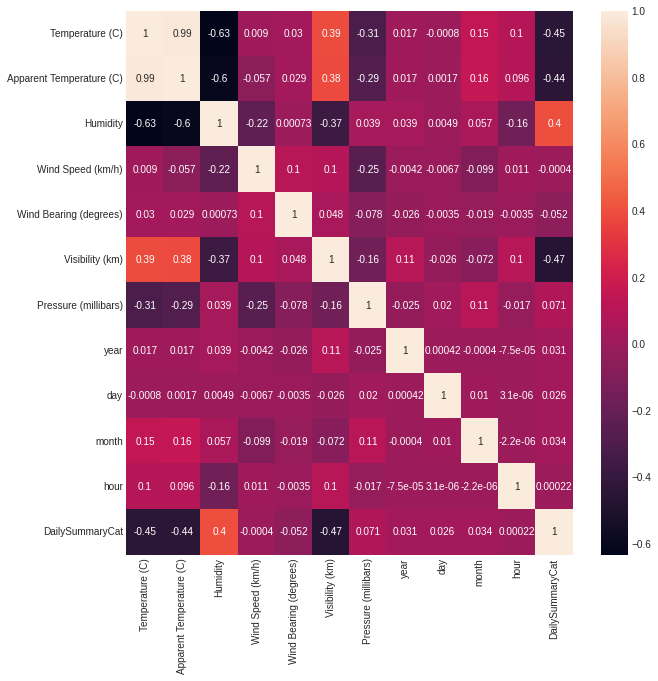

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               96453 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   Daily Summary             96453 non-null  object 
 10  year                      96453 non-null  int64  
 11  day                       96453 non-null  int64  
 12  month                     96453 non-null  int64  
 13  hour                      96453 non-null  int64  
 14  DailyS

In [ ]:
data.drop('Daily Summary',axis=1,inplace=True)

In [ ]:
data.isna().sum()

Summary                         0
Precip Type                     0
Temperature (C)                 0
Apparent Temperature (C)        0
Humidity                        0
Wind Speed (km/h)               0
Wind Bearing (degrees)          0
Visibility (km)                 0
Pressure (millibars)            0
year                            0
day                             0
month                           0
hour                            0
DailySummaryCat             15048
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
year                        0
day                         0
month                       0
hour                        0
DailySummaryCat             0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
y = data.iloc[:,-1].values #daily summary cat
x = data.iloc[:,3:8].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=33, shuffle = True)

In [ ]:
np.any(np.isnan(X_test))

False

In [ ]:
np.any(np.isnan(y_test))

False

In [ ]:
np.all(np.isfinite(X_test))

True

In [ ]:
np.all(np.isfinite(y_test))

True

In [ ]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,day,month,hour,DailySummaryCat
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,31,3,22,1.0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,31,3,23,1.0
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,1,4,0,1.0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,1,4,1,1.0
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,1,4,2,1.0


#**Model 1-Logistic Regression**

In [ ]:
#using gd and loss func is NLL
weather_types = set(data['DailySummaryCat'])
accuracies = list()

for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)  
  #randomly initializing weights  
  w = np.random.random(5)
  epoch = 0
  eta = 0.001

  while (epoch<=25):
        epoch = epoch + 1
        w_old = w 
        #mapping the dataset
        for xi,yi in zip(X_train,y_train):
          prod = np.dot(xi,w.T)
          sigma = 1/(1+np.exp(-prod))
          if sigma >= 0.5:
            y_hat = 1
          else:
            y_hat = 0
          if y_hat == yi:
            continue
          else:
            #weight updation
            w = w_old + eta*(yi - sigma)*xi
        
        
        if np.array_equal(w,w_old):
          break
      
  prod = np.dot(X_test,w.T)
  sigma = 1/(1+np.exp(-prod))
  sigma[sigma<0.5] = 0
  sigma[sigma>=0.5] = 1
  accuracies.append(accuracy_score(y_test,sigma))
print("Accuracy: ",np.mean(accuracies))

Accuracy:  0.6060606060606061


#**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
np.any(np.isnan(X_train))

False

In [ ]:
np.all(np.isfinite(X_train))

True

In [ ]:
weather_types = set(data['DailySummaryCat'])
accuracies = list()

for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)
  svm = SVC(kernel = 'linear',max_iter=1000,gamma='auto')
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.06060606060606061


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
weather_types = set(data['DailySummaryCat'])
accuracies = list()
for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)
  svm = SVC(kernel = 'poly',max_iter=1000,gamma='auto')
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.2727272727272727


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
weather_types = set(data['DailySummaryCat'])
accuracies = list()
for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)
  #gaussian kernel
  svm = SVC(kernel = 'rbf',max_iter=1000,gamma='auto')
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.5757575757575758


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
weather_types = set(data['DailySummaryCat'])
accuracies = list()
for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)
  #activation function
  svm = SVC(kernel = 'sigmoid',max_iter=1000,gamma='auto')
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.15151515151515152


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


#**KNN**

In [ ]:
def KNN(K,pointtobepredicted,X_train,y_train):
  dist_list=[]
  for i in range(len(X_train)):
    xi=list(X_train[i])
    dist=0
    for j in range(len(pointtobepredicted)):
      dist+=(xi[j]-pointtobepredicted[j])**2
    dist=np.sqrt(dist)
    dist_list.append(dist)
  list1=np.argsort(dist_list)
  vote_0=0
  vote_1=1
  #majority minority class
  for i in range(K):

    if y_train[list1[i]]==1:
      vote_1+=1
    else:
      vote_0+=1
  if vote_0>vote_1:
    return 0
  else:
    return 1

In [ ]:
weather_types = set(data['DailySummaryCat'])
accuracies = list()
for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)
  for i in range(0,len(X_test)):
    y_hat=[]
    y_hat.append(KNN(3,X_test[i],X_train,y_train))
    accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))
 

Accuracy:  0.15151515151515155


#**PCA**

In [ ]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [ ]:
X_reduced = PCA(x , 2)

In [ ]:
m=X_reduced.shape[0] #number of datapoints
n=X_reduced.shape[1] #number of features
n_iter=100
print(m)
print(n)

81405
2


In [ ]:
K = 4
Centroids=np.array([]).reshape(n,0) 

In [ ]:
import random as rd
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X_reduced[rand]]

In [ ]:
Output={}

In [ ]:
for i in range(n_iter):
   
      euc_dist=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X_reduced-Centroids[:,k])**2,axis=1)
          euc_dist=np.c_[euc_dist,tempDist]
      C=np.argmin(euc_dist,axis=1)+1
   
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X_reduced[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

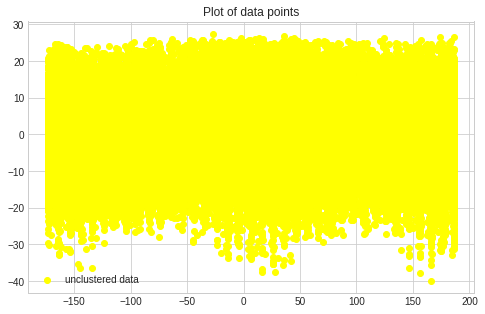

In [ ]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c='yellow',label='unclustered data')
plt.legend()
plt.title('Plot of data points')
plt.show()

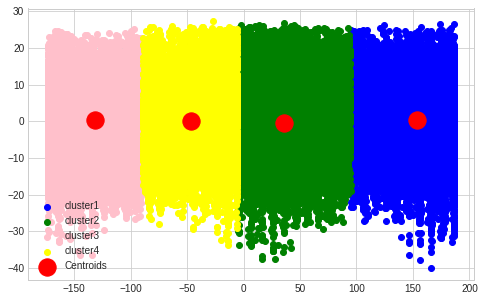

In [ ]:
#plotting the model
color=['blue','green','pink','yellow']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='red',label='Centroids')
plt.legend()
plt.show()

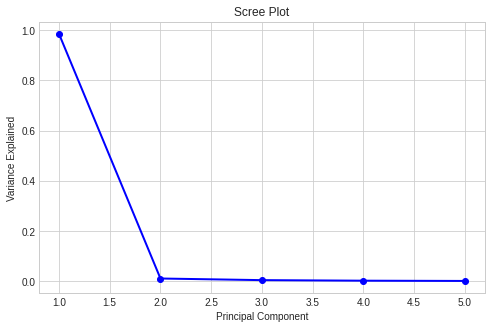

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#fit PCA model to data
pca=PCA()
pca_fit = pca.fit(x)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

#**Linear Regression**

In [ ]:
# Extract 3 columns 'Temperature (C)','Apparent Temperature (C)', 'Humidity' for pure and better showing
weatherHistory_df = data[['Temperature (C)','Apparent Temperature (C)', 'Humidity']]

# And called again
weatherHistory_df.columns = ['Temperature', 'Apparent_Temperature', 'Humidity']

In [ ]:
weatherHistory_df = weatherHistory_df[:][:500]      # lets take limit for speed regression calculating
weatherHistory_df.head(2)

,Temperature,Apparent_Temperature,Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86


In [ ]:
y = np.array(weatherHistory_df['Humidity']).reshape(-1, 1)
X = np.array(weatherHistory_df['Apparent_Temperature']).reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_df = LinearRegression() 
#SSE is used 
lin_df.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_df.predict(X_test)                                     # Predict Linear Model
accuracy_score = lin_df.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

Linear Regression Model Accuracy Score: 58.9%


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.589


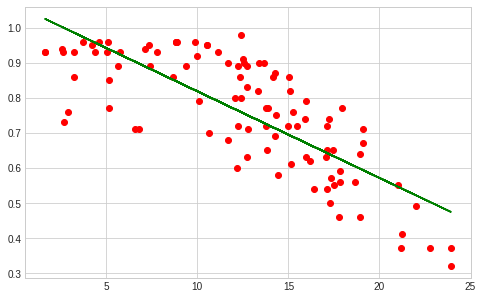

In [ ]:
# Finally draw figure of Linear Regression Model

plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

**2.Multiple linear regression**

In [ ]:
X=data.iloc[:,2:4].values
y=data.iloc[:,4].values

In [ ]:
print(X)

[[ 9.47222222  7.38888889]
 [ 9.35555556  7.22777778]
 [ 9.37777778  9.37777778]
 ...
 [22.03888889 22.03888889]
 [21.52222222 21.52222222]
 [20.43888889 20.43888889]]


In [ ]:
print(y)

[0.89 0.86 0.89 ... 0.56 0.6  0.61]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
mlin_df = LinearRegression()
mlin_df = mlin_df.fit(X_train, y_train)
mlin_df.intercept_       # constant b0
mlin_df.coef_            # variable coefficient

array([-0.04991783,  0.03321212])

In [ ]:
y_pred = mlin_df.predict(X_test)                                      # predict Multi linear Reg model
rmse = np.sqrt(mean_squared_error(y_test, mlin_df.predict(X_test)))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_test, y_pred))); 

RMSE Score for Test set: 0.15
R2 Score for Test set: 0.46


Text(0.5, 1.0, 'Actual vs Predicted')

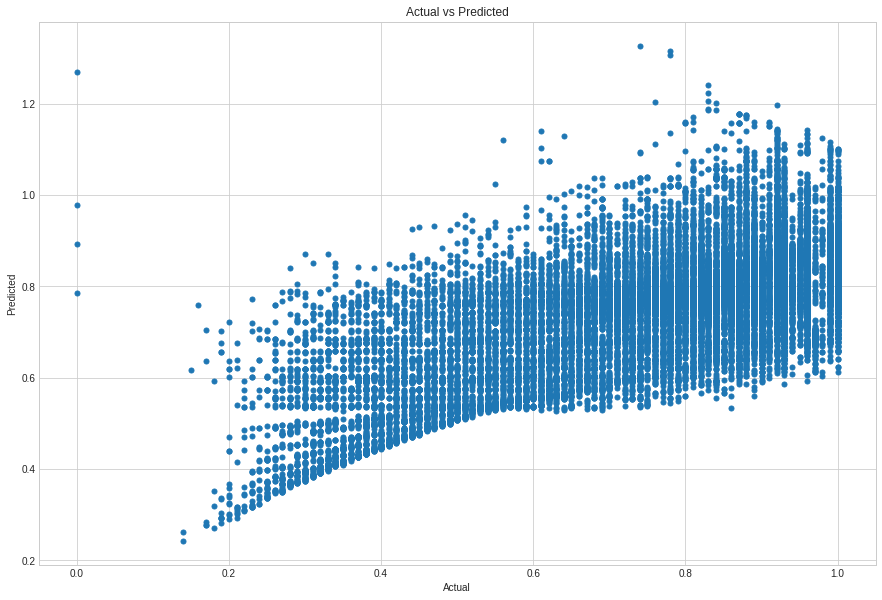

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred, s=25)
#plt.plot(y_test, y_pred, color='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')


In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
0,0.72,0.792213,-0.072213
1,0.89,0.843630,0.046370
2,0.38,0.439892,-0.059892
3,0.66,0.744973,-0.084973
4,0.67,0.769753,-0.099753
5,0.70,0.760472,-0.060472
6,0.92,0.844076,0.075924
7,0.87,0.783266,0.086734
8,0.86,0.755832,0.104168
9,0.86,0.786645,0.073355


**3.Polynomial Regression**

In [ ]:
y = np.array(weatherHistory_df['Humidity']).reshape(-1, 1)
X = np.array(weatherHistory_df['Apparent_Temperature']).reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 5)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.097
R2 Score for Test set: 0.67


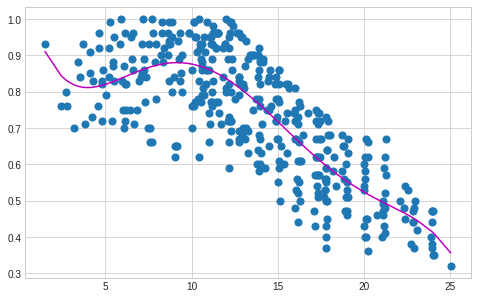

In [ ]:
import operator
plt.scatter(X_train, y_train, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,polynomial_predict), key=sort_axis)
X_train, polynomial_predict = zip(*sorted_zip)
plt.plot(X_train, polynomial_predict, color='m')
plt.show()

#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dt_reg = DecisionTreeRegressor()          # create  DecisionTreeReg with sklearn
regr=dt_reg.fit(X_train,y_train)

In [ ]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_0 <= 15.09
|   |--- feature_0 <= 12.94
|   |   |--- feature_0 <= 11.98
|   |   |   |--- feature_0 <= 7.72
|   |   |   |   |--- feature_0 <= 7.70
|   |   |   |   |   |--- feature_0 <= 7.64
|   |   |   |   |   |   |--- feature_0 <= 7.54
|   |   |   |   |   |   |   |--- feature_0 <= 3.29
|   |   |   |   |   |   |   |   |--- feature_0 <= 1.97
|   |   |   |   |   |   |   |   |   |--- value: [0.93]
|   |   |   |   |   |   |   |   |--- feature_0 >  1.97
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 2.98
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 2.56
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.76]
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  2.56
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_0 >  2.98
|   |   |   |   |   |   |   |   |   |   |--- value: [0.70]
|   |   |   |   |   |   |   |--- feature_0 >  3.29
|   |   |   |   |   |   |   |   |--- featu

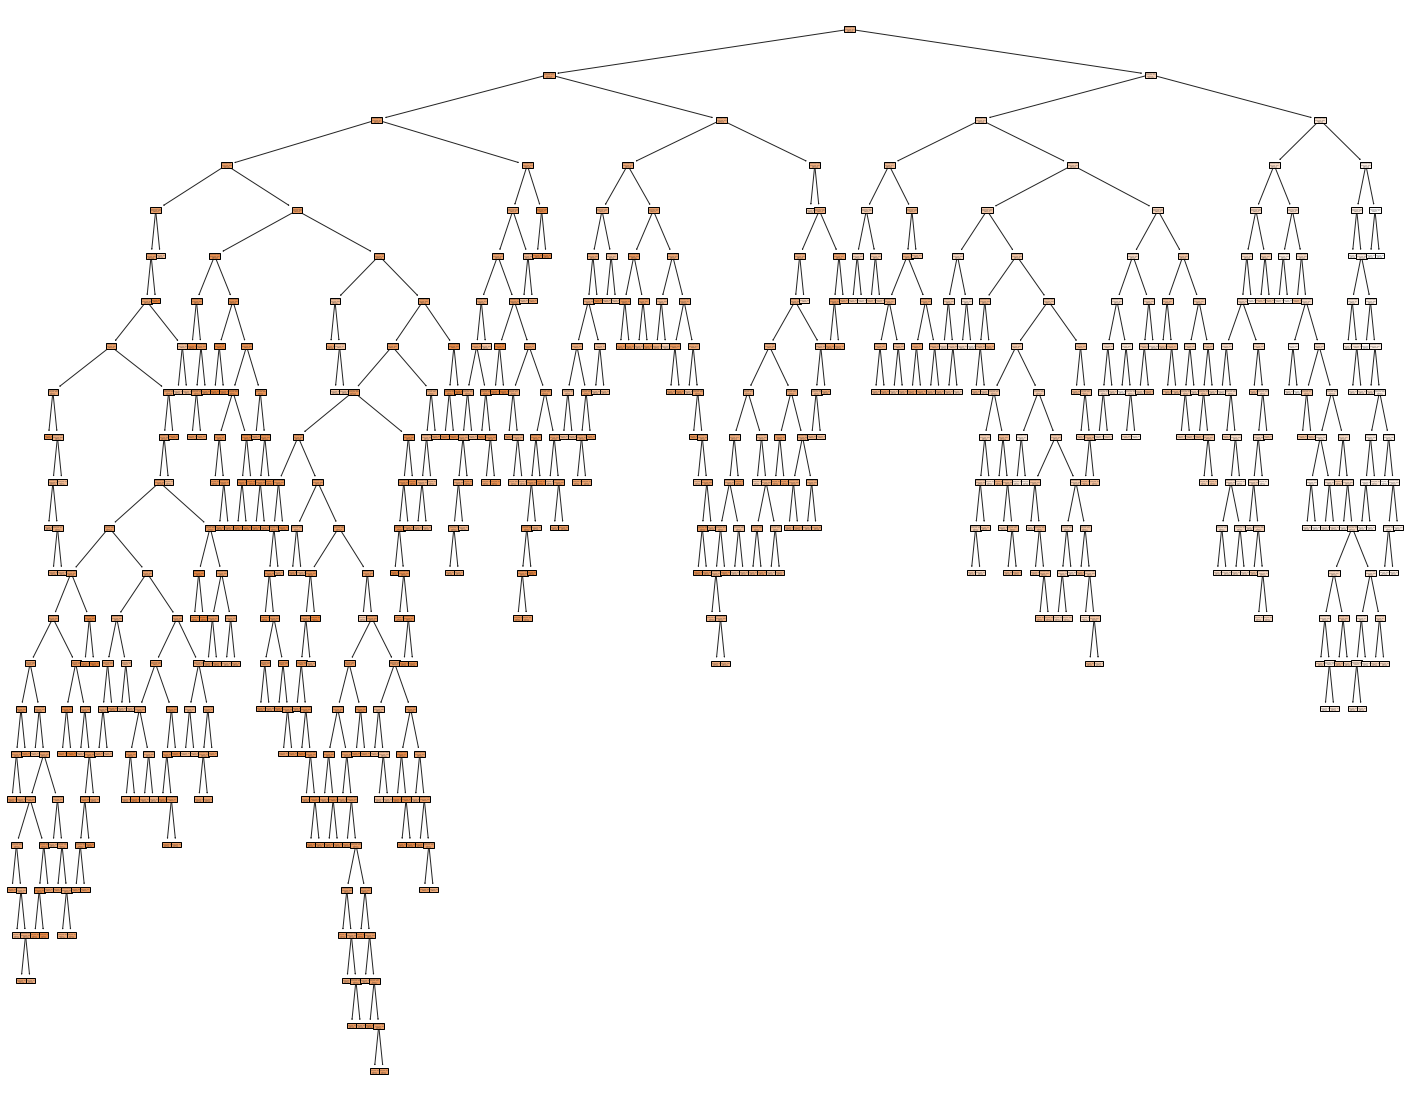

In [ ]:
#from sklearn import datasets
#df=datasets.load_weatherHistory()
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=X_test, filled=True)

In [ ]:
dt_predict = dt_reg.predict(X_train)
#dt_predict.mean()

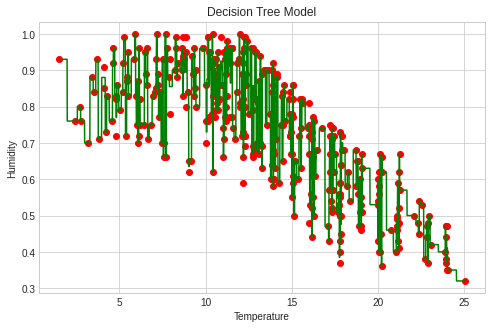

In [ ]:
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="g")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Decision Tree Model")
plt.show()


In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,dt_predict))
r2 = r2_score(y_train,dt_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.031
R2 Score for Test set: 0.97


#**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=5, random_state=0)
rf_reg.fit(X_train,y_train)
rf_predict = rf_reg.predict(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


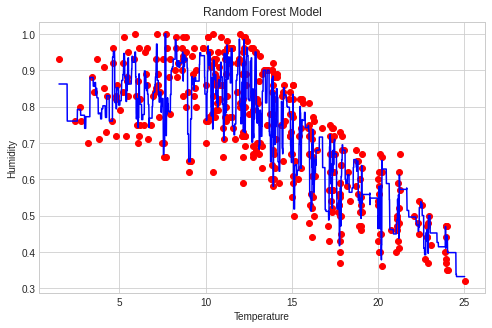

In [ ]:
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,rf_reg.predict(X_grid),color="b")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Random Forest Model")
plt.show()


In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,rf_predict))
r2 = r2_score(y_train,rf_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))
#decision tree best with 86% accuracy

RMSE Score for Test set: 0.055
R2 Score for Test set: 0.9


**Visualization Weather**

In [ ]:
#Drawing a heatmap
def facet_heatmap(data, color, **kws):
    values=data.columns.values[3]
    data = data.pivot(index='day', columns='hour', values=values)
    sns.heatmap(data, cmap='coolwarm', **kws)  

#Joining heatmaps of every month in a year 
def weather_calendar(year,weather): #Year= Any year in DataFrame. Weather=Any quantitative variable
    datayear = data[data['year']==year][['month', 'day', 'hour', weather]]
    vmin=datayear[weather].min()
    vmax=datayear[weather].max()
    with sns.plotting_context(font_scale=12):
        g = sns.FacetGrid(datayear,col="month", col_wrap=3) #One heatmap per month
        g = g.map_dataframe(facet_heatmap,vmin=vmin, vmax=vmax)
        g.set_axis_labels('Hour', 'Day')
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle('%s Calendar. Year: %s.' %(weather, year), fontsize=18)

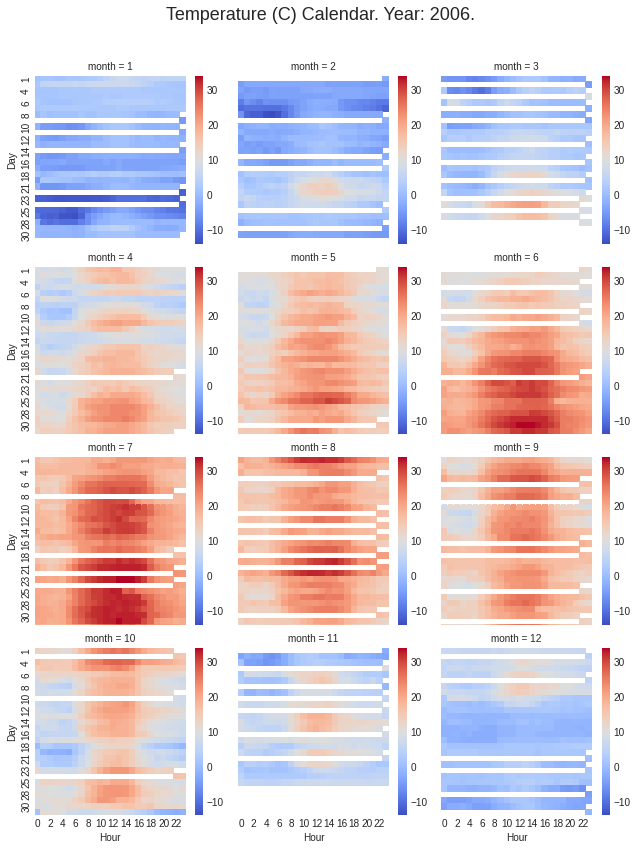

In [ ]:
weather_calendar(2006,'Temperature (C)')

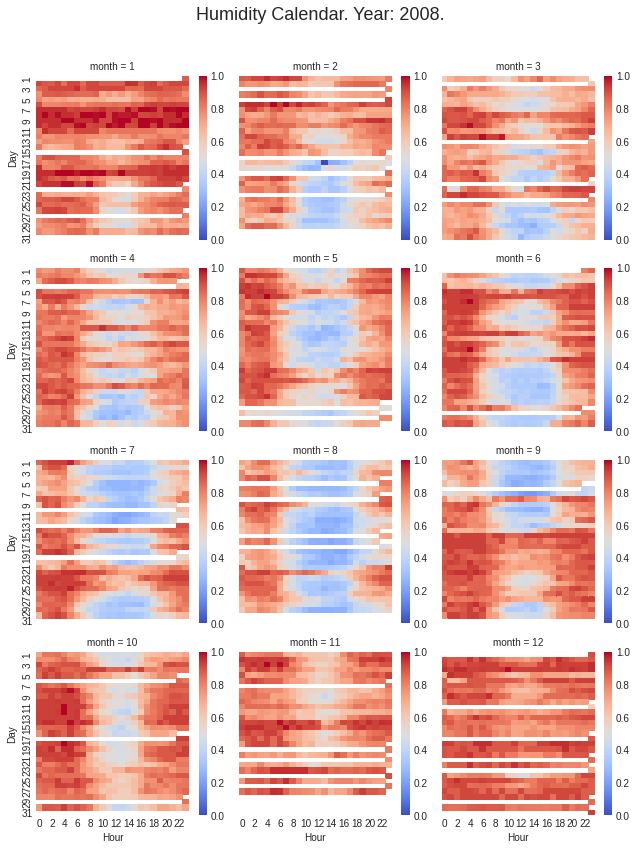

In [ ]:
weather_calendar(2008,'Humidity')

#**Conclusion**

**The best model is logistic regression  with the accuracy of 0.60606**

In [ ]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [ ]:
x = data.iloc[:,3:8].values
X_reduced = PCA(x , 2)

In [ ]:
from sklearn.model_selection import train_test_split
y = data.iloc[:,-1].values #daily summary cat
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=33, shuffle = True)

In [ ]:
#using gd and loss func is NLL
weather_types = set(data['DailySummaryCat'])
accuracies = list()

for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)  
  #randomly initializing weights  
  w = np.random.random(2)
  epoch = 0
  eta = 0.001

  while (epoch<=25):
        epoch = epoch + 1
        w_old = w 
        #mapping the dataset
        for xi,yi in zip(X_train,y_train):
          prod = np.dot(xi,w.T)
          sigma = 1/(1+np.exp(-prod))
          if sigma >= 0.5:
            y_hat = 1
          else:
            y_hat = 0
          if y_hat == yi:
            continue
          else:
            #weight updation
            w = w_old + eta*(yi - sigma)*xi
        
        
        if np.array_equal(w,w_old):
          break
      
  prod = np.dot(X_test,w.T)
  sigma = 1/(1+np.exp(-prod))
  sigma[sigma<0.5] = 0
  sigma[sigma>=0.5] = 1
  accuracies.append(accuracy_score(y_test,sigma))
print("Accuracy: ",np.mean(accuracies))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


Accuracy:  0.15151515151515152


In [ ]:
from sklearn.svm import SVC

In [ ]:
weather_types = set(data['DailySummaryCat'])
accuracies = list()

for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)
  svm = SVC(kernel = 'linear',max_iter=1000,gamma='auto')
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.3939393939393939


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
weather_types = set(data['DailySummaryCat'])
accuracies = list()
for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)
  svm = SVC(kernel = 'poly',max_iter=1000,gamma='auto')
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.2727272727272727


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
weather_types = set(data['DailySummaryCat'])
accuracies = list()
for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)
  #gaussian kernel
  svm = SVC(kernel = 'rbf',max_iter=1000,gamma='auto')
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.36363636363636365


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
weather_types = set(data['DailySummaryCat'])
accuracies = list()
for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)
  #activation function
  svm = SVC(kernel = 'sigmoid',max_iter=1000,gamma='auto')
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy:  0.3333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
def KNN(K,pointtobepredicted,X_train,y_train):
  dist_list=[]
  for i in range(len(X_train)):
    xi=list(X_train[i])
    dist=0
    for j in range(len(pointtobepredicted)):
      dist+=(xi[j]-pointtobepredicted[j])**2
    dist=np.sqrt(dist)
    dist_list.append(dist)
  list1=np.argsort(dist_list)
  vote_0=0
  vote_1=1
  #majority minority class
  for i in range(K):

    if y_train[list1[i]]==1:
      vote_1+=1
    else:
      vote_0+=1
  if vote_0>vote_1:
    return 0
  else:
    return 1

In [ ]:
weather_types = set(data['DailySummaryCat'])
accuracies = list()
for weather_type in weather_types:
  df_cpy = data.copy()
  df_cpy = df_cpy.replace(to_replace=[x for x in weather_types if x != weather_type], value=0)
  df_cpy = df_cpy.replace(to_replace=weather_type, value=1)
  for i in range(0,len(X_test)):
    y_hat=[]
    y_hat.append(KNN(3,X_test[i],X_train,y_train))
    accuracies.append(accuracy_score(y_test,y_pred))
print("Accuracy: ",np.mean(accuracies))

Accuracy:  0.33333333333333326
